In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('smdm_data.csv')
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
0,120,0.000,0.0,0.000,0.000,0.0,0.0,73,0.5,43,...,126,2,0,120,137,121,73,1,9,2
1,132,0.006,0.0,0.006,0.003,0.0,0.0,17,2.1,0,...,198,6,1,141,136,140,12,0,6,1
2,133,0.003,0.0,0.008,0.003,0.0,0.0,16,2.1,0,...,198,5,1,141,135,138,13,0,6,1
3,134,0.003,0.0,0.008,0.003,0.0,0.0,16,2.4,0,...,170,11,0,137,134,137,13,1,6,1
4,132,0.007,0.0,0.008,0.000,0.0,0.0,16,2.4,0,...,170,9,0,137,136,138,11,1,2,1


In [14]:
df.tail()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
2121,140,0.000,0.000,0.007,0.0,0.0,0.0,79,0.2,25,...,177,4,0,153,150,152,2,0,5,2
2122,140,0.001,0.000,0.007,0.0,0.0,0.0,78,0.4,22,...,169,6,0,152,148,151,3,1,5,2
2123,140,0.001,0.000,0.007,0.0,0.0,0.0,79,0.4,20,...,170,5,0,153,148,152,4,1,5,2
2124,140,0.001,0.000,0.006,0.0,0.0,0.0,78,0.4,27,...,169,6,0,152,147,151,4,1,5,2
2125,142,0.002,0.002,0.008,0.0,0.0,0.0,74,0.4,36,...,159,2,1,145,143,145,1,0,1,1


In [15]:
df.isnull().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
CLASS       0
NSP         0
dtype: int64

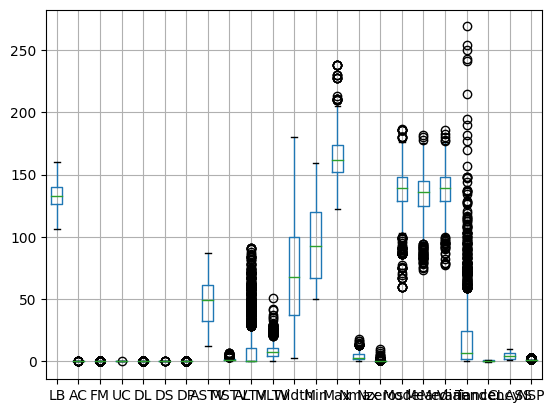

In [16]:
df.boxplot()
plt.show()

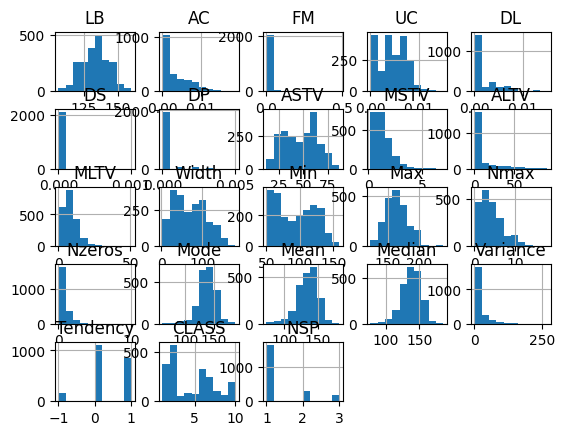

In [17]:
df.hist()
plt.show()

In [18]:
num_feats=df.iloc[:,0:21]
cat_feats=df.iloc[:,21:23]
Q1 = num_feats.quantile(0.25)
Q3 = num_feats.quantile(0.75)
IQR = Q3 - Q1
mask = (num_feats < (Q1 - 1.5 * IQR)) | (num_feats > (Q3 + 1.5 * IQR))
num_feats[mask] = np.nan
num_feats.isnull().sum().sum()

1982

In [19]:
df=pd.concat([num_feats,cat_feats],axis=1)

# Τρέχουμε τον κώδικα μέχρι εδώ και μετά για κάθε μέθοδο συνεχίζουμε ξεχωριστά

# Group by 'CLASS'

In [20]:
df=df.groupby('CLASS',sort=False,group_keys=True).apply(lambda x:x.fillna(x.mean()))
df.head()

LB   AC   FM     UC   DL   DS   DP  ASTV  MSTV      ALTV  ...  \
CLASS                                                                ...   
9     0   120  0.0  0.0  0.000  0.0  0.0  0.0    73   0.5  7.615385  ...   
      7   122  0.0  0.0  0.000  0.0  0.0  0.0    83   0.5  6.000000  ...   
      8   122  0.0  0.0  0.002  0.0  0.0  0.0    84   0.5  5.000000  ...   
      9   122  0.0  0.0  0.003  0.0  0.0  0.0    86   0.3  6.000000  ...   
      23  128  0.0  0.0  0.000  0.0  0.0  0.0    80   0.5  0.000000  ...   

            Max  Nmax  Nzeros   Mode   Mean  Median  Variance  Tendency  \
CLASS                                                                     
9     0   126.0   2.0     0.0  120.0  137.0   121.0       2.0         1   
      7   130.0   0.0     0.0  122.0  122.0   123.0       3.0         1   
      8   130.0   0.0     0.0  122.0  122.0   123.0       3.0         1   
      9   130.0   1.0     0.0  122.0  122.0   123.0       1.0         1   
      23  130.0   0.0     0.0  126.0  124.0   125.0       1.0         1   

          CLASS  NSP  
CLASS                 
9     0       9    2  
      7       9    3  
      8       9    3  
      9       9    3  
      23      9    3  

[5 rows x 23 columns]

In [21]:
df.index=df.index.get_level_values(1)
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
0,120,0.0,0.0,0.000,0.0,0.0,0.0,73,0.5,7.615385,...,126.0,2.0,0.0,120.0,137.0,121.0,2.0,1,9,2
7,122,0.0,0.0,0.000,0.0,0.0,0.0,83,0.5,6.000000,...,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1,9,3
8,122,0.0,0.0,0.002,0.0,0.0,0.0,84,0.5,5.000000,...,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1,9,3
9,122,0.0,0.0,0.003,0.0,0.0,0.0,86,0.3,6.000000,...,130.0,1.0,0.0,122.0,122.0,123.0,1.0,1,9,3
23,128,0.0,0.0,0.000,0.0,0.0,0.0,80,0.5,0.000000,...,130.0,0.0,0.0,126.0,124.0,125.0,1.0,1,9,3


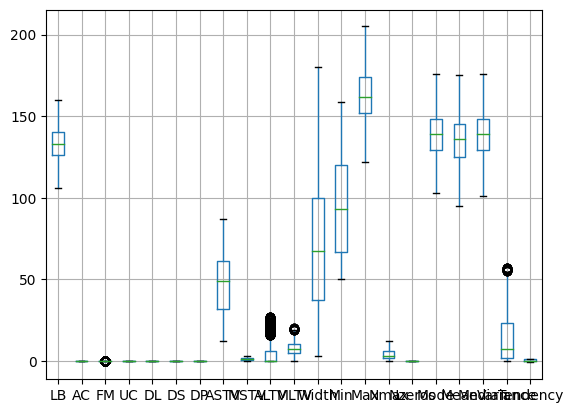

In [22]:
df.iloc[:,:21].boxplot()
plt.show()

In [119]:
num_feats=df.iloc[:,0:21]
cat_feats=df.iloc[:,21:23]
Q1 = num_feats.quantile(0.25)
Q3 = num_feats.quantile(0.75)
IQR = Q3 - Q1
mask = (num_feats < (Q1 - 1.5 * IQR)) | (num_feats > (Q3 + 1.5 * IQR))
num_feats[mask] = np.nan
num_feats.isnull().sum().sum()

411

# Group by NSP 

In [77]:
df=df.groupby('NSP',sort=False,group_keys=True).apply(lambda x:x.fillna(x.mean()))

In [78]:
df.index=df.index.get_level_values(1)
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
0,120,0.000,0.000000,0.000,0.000000,0.0,0.0,73,0.500000,11.778523,...,126.0,2.0,0.0,120.0,137.0,121.0,4.21831,1,9,2
10,151,0.000,0.000000,0.001,0.001000,0.0,0.0,64,1.900000,9.000000,...,186.0,2.0,0.0,150.0,148.0,151.0,9.00000,1,10,2
11,150,0.000,0.000000,0.001,0.001000,0.0,0.0,64,2.000000,8.000000,...,186.0,5.0,0.0,150.0,148.0,151.0,10.00000,1,10,2
17,131,0.002,0.001226,0.003,0.005000,0.0,0.0,18,2.400000,0.000000,...,174.0,5.0,0.0,134.0,125.0,132.0,45.00000,0,7,2
28,132,0.000,0.001226,0.001,0.000438,0.0,0.0,29,0.590411,0.000000,...,191.0,7.0,0.0,133.0,119.0,129.0,4.21831,0,7,2


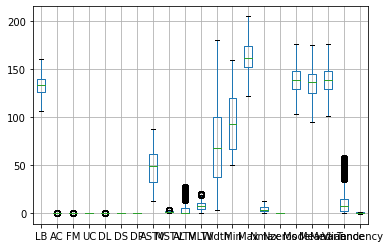

In [79]:
df.iloc[:,:21].boxplot()
plt.show()

In [80]:
num_feats=df.iloc[:,0:21]          #Ξανατρέχω αυτο το κομμάτι για να μετρήσω τα outliers,ωστόσο πριν αποθηκεύσω το νέο csv δε θα τρέξω αυτό το κομμάτι
cat_feats=df.iloc[:,21:23]
Q1 = num_feats.quantile(0.25)
Q3 = num_feats.quantile(0.75)
IQR = Q3 - Q1
mask = (num_feats < (Q1 - 1.5 * IQR)) | (num_feats > (Q3 + 1.5 * IQR))
num_feats[mask] = np.nan
num_feats.isnull().sum().sum()

837

# KNN

In [140]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
cleaner=KNNImputer(n_neighbors=10,weights='distance')

In [141]:
num_feats=df.iloc[:,0:21]
scaler=StandardScaler()
X=scaler.fit_transform(num_feats)
X=pd.DataFrame(X)
X=cleaner.fit_transform(X)

In [142]:
df_imputed=pd.DataFrame(X)
df_imputed.head()
result = pd.concat([df_imputed, cat_feats], axis=1)
result.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,CLASS,NSP
0,-1.352220,-0.023713,-0.493761,-0.804016,-0.145282,0.0,0.0,-0.057603,0.379534,1.292742,...,1.524807,1.789914,0.0,-1.052111,-0.895377,-0.926639,0.246519,-0.524526,2,1
1,1.493734,0.245543,-0.493761,0.217427,-0.636852,0.0,0.0,-0.581201,-0.623266,-0.508822,...,1.049319,-1.062037,0.0,1.388634,1.534212,1.518010,-0.638943,-0.524526,2,1
2,-0.030884,1.322565,1.075256,-0.123054,-0.636852,0.0,0.0,-0.639378,2.671649,-0.508822,...,-0.258272,0.007445,0.0,0.320808,0.105042,0.258645,1.205769,1.112980,2,1
3,0.782245,-0.831479,1.417199,-1.484978,-0.636852,0.0,0.0,1.687723,-1.482809,2.442794,...,-1.030940,-1.062037,0.0,0.244535,0.319417,0.258645,-0.860309,-0.524526,10,2
4,-0.335808,-0.831479,0.097614,-0.463535,0.837859,0.0,0.0,-1.046621,1.382334,-0.508822,...,1.584243,1.835015,0.0,-0.747017,-2.110172,-1.222960,1.792599,-0.524526,8,3


In [143]:
result.shape

(2126, 23)

In [144]:
df=result
df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,CLASS,NSP
0,-1.352220,-0.023713,-0.493761,-0.804016,-0.145282,0.0,0.0,-0.057603,0.379534,1.292742,...,1.524807,1.789914,0.0,-1.052111,-0.895377,-0.926639,0.246519,-0.524526,2,1
1,1.493734,0.245543,-0.493761,0.217427,-0.636852,0.0,0.0,-0.581201,-0.623266,-0.508822,...,1.049319,-1.062037,0.0,1.388634,1.534212,1.518010,-0.638943,-0.524526,2,1
2,-0.030884,1.322565,1.075256,-0.123054,-0.636852,0.0,0.0,-0.639378,2.671649,-0.508822,...,-0.258272,0.007445,0.0,0.320808,0.105042,0.258645,1.205769,1.112980,2,1
3,0.782245,-0.831479,1.417199,-1.484978,-0.636852,0.0,0.0,1.687723,-1.482809,2.442794,...,-1.030940,-1.062037,0.0,0.244535,0.319417,0.258645,-0.860309,-0.524526,10,2
4,-0.335808,-0.831479,0.097614,-0.463535,0.837859,0.0,0.0,-1.046621,1.382334,-0.508822,...,1.584243,1.835015,0.0,-0.747017,-2.110172,-1.222960,1.792599,-0.524526,8,3


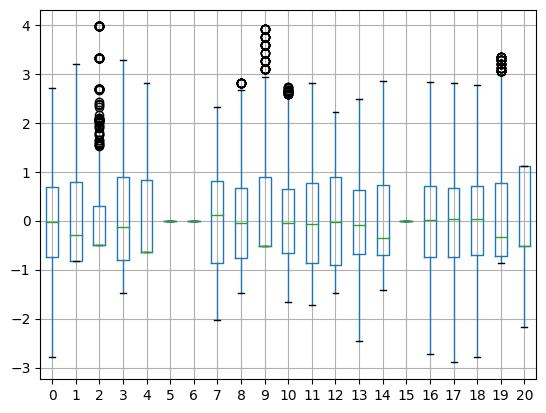

In [145]:
df.iloc[:,:21].boxplot()
plt.show()

In [147]:
num_feats=df.iloc[:,0:21]
cat_feats=df.iloc[:,21:23]
Q1 = num_feats.quantile(0.25)
Q3 = num_feats.quantile(0.75)
IQR = Q3 - Q1
mask = (num_feats < (Q1 - 1.5 * IQR)) | (num_feats > (Q3 + 1.5 * IQR))
num_feats[mask] = np.nan
num_feats.isnull().sum().sum()

285

# Τελικά το ΚΝΝ δείχνει να αντιμετωπίζει τα περισσότερα outliers ωστόσο είναι sensitive σε μη scaled data και καθώς το mean by CLASS επiτυγχάνει αριθμό κοντινό θα κρατήσουμε τον τελευταίο.

In [172]:
df.head()
df.tail()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
1979,135,0.0,0.000,0.0,0.0,0.0,0.0,68,0.3,7.615385,...,143.0,1.0,0.0,137.0,136.0,138.0,0.0,0,9,3
2033,124,0.0,0.000,0.0,0.0,0.0,0.0,87,0.2,7.615385,...,128.0,0.0,0.0,124.0,123.0,125.0,0.0,0,9,3
2035,124,0.0,0.000,0.0,0.0,0.0,0.0,86,0.4,14.000000,...,146.0,1.0,0.0,126.0,126.0,127.0,0.0,-1,9,3
2066,150,0.0,0.002,0.0,0.0,0.0,0.0,84,0.3,7.615385,...,156.0,0.0,0.0,150.0,150.0,151.0,0.0,0,9,3
2101,150,0.0,0.001,0.0,0.0,0.0,0.0,79,0.2,7.615385,...,152.0,1.0,0.0,150.0,149.0,151.0,0.0,0,9,3


# df = df.sample(frac = 1)
# df.to_csv('imputed_data.csv')